In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('./data/data_banknote_authentication.csv')

In [24]:
df.head()

Variance_Wavelet  Skewness_Wavelet  Curtosis_Wavelet  Image_Entropy  Class
0           3.62160            8.6661           -2.8073       -0.44699      0
1           4.54590            8.1674           -2.4586       -1.46210      0
2           3.86600           -2.6383            1.9242        0.10645      0
3           3.45660            9.5228           -4.0112       -3.59440      0
4           0.32924           -4.4552            4.5718       -0.98880      0

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

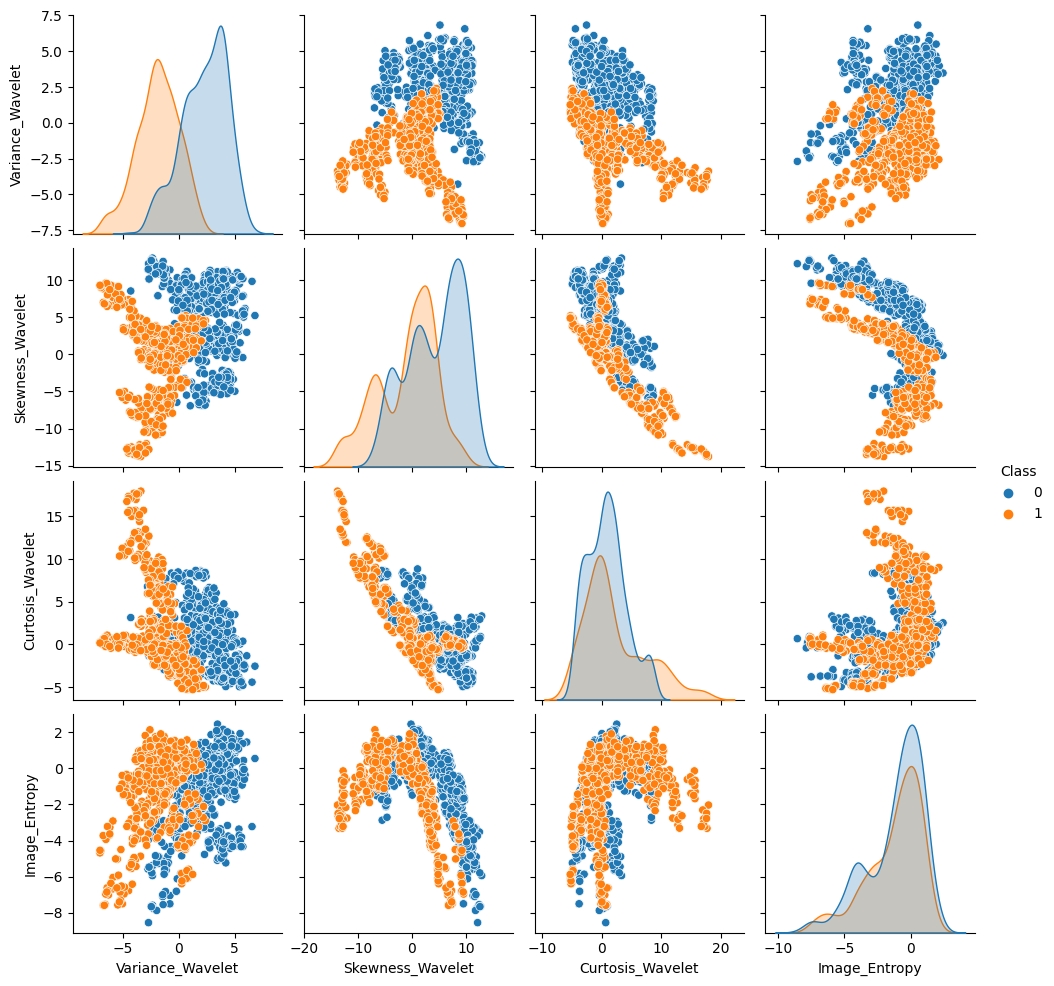

In [25]:
sns.pairplot(df,hue='Class')

In [26]:
X = df.drop('Class',axis=1)

In [27]:
y = df['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [33]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'bootstrap' : bootstrap,
             'oob_score' : oob_score}

In [34]:
rfc = RandomForestClassifier()

In [35]:
grid = GridSearchCV(rfc,param_grid)

In [36]:
grid.fit(X_train, y_train)

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 417, i

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [37]:
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [38]:
predictions = grid.predict(X_test)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       124
           1       0.98      0.99      0.98        82

    accuracy                           0.99       206
   macro avg       0.98      0.99      0.98       206
weighted avg       0.99      0.99      0.99       206



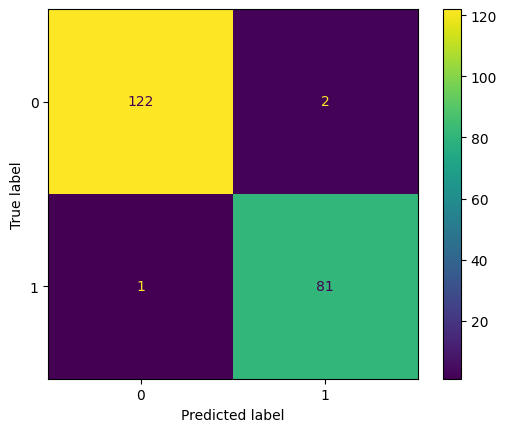

In [41]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)